In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import itertools as it
import scipy.stats.qmc as ssq
from scipy.stats import chi2, truncnorm
from seaborn import displot
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from skopt import BayesSearchCV
from skopt.space.space import Real, Integer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, KBinsDiscretizer
from imblearn.over_sampling import SMOTE, SMOTENC
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer

np.set_printoptions(threshold=100_000)
X = pd.read_csv(r"C:\Users\dwigh\OneDrive\Desktop\Emissions Uncertainty on Antarctic Instability\ensemble_output\results\default\parameters.csv")
# X = X[['gamma_g', 't_peak', 'gamma_d', 'sd_antarctic',
#        'rho_greenland', 'rho_gmsl', 'temperature_0', 'ocean_heat_0', 'Q10',
#        'CO2_diffusivity', 'heat_diffusivity', 'rf_scale_aerosol',
#        'climate_sensitivity', 'thermal_alpha', 'greenland_a', 'greenland_b',
#        'greenland_alpha', 'greenland_beta', 'anto_alpha', 'antarctic_mu',
#        'antarctic_precip0', 'antarctic_runoff_height0', 'antarctic_lambda',
#        'antarctic_temp_threshold', 'lw_random_sample']].copy()
Y = pd.read_csv(r"C:\Users\dwigh\OneDrive\Desktop\Emissions Uncertainty on Antarctic Instability\ensemble_output\results\default\gmslr.csv")
Y = Y.mean(axis=1).rename('output')
sorted_indices = X.t_peak.to_numpy().ravel().argsort()
# bins = pd.IntervalIndex.from_tuples([(2030, 2069), (2070,2109), (2110, 2149), (2150, 2178)])
# X['t_peak'] = pd.cut(X.t_peak.to_numpy(), bins=4)
X.t_peak = X.t_peak.astype('category')

X_dummy = pd.get_dummies(X.copy(),prefix=['emission_year'], dtype=float)
# obj1 = X_res.join(Y1, how='left')
# obj = X.join(Y, how='left')
# nun = len(X.t_peak.unique())
# discret = KBinsDiscretizer(n_bins=nun, encode='ordinal', random_state=0)
# Y_binned = discret.fit_transform(Y.to_numpy().reshape(-1,1)).ravel()
# smote = SMOTENC(categorical_features=['t_peak'],sampling_strategy='auto', random_state=0)
# X_res , y_res = smote.fit_resample(X, Y_binned)
# Y1 = pd.Series(discret.inverse_transform(y_res.reshape(-1,1)).ravel(), name='output')
obj = X_dummy.join(Y, how='left')
# X_res = pd.DataFrame(X_res, columns=X.columns)
# obj = pd.concat([X_res, y_res], axis=1)
# sorted_obj = obj.iloc[sorted_indices,:].copy()
# X.t_peak = X.t_peak.astype('float64')
# Rescaling the dataset
# min_max = MinMaxScaler()
# min_max.fit(obj.iloc[:,:-1],obj.iloc[:,-1])

# obj_scaled = min_max.transform(obj.iloc[:,:-1])
# obj_y = obj.iloc[:,-1].copy()

In [4]:
obj = obj.iloc[sorted_indices,:].copy()
# sobj.t_peak = sobj.t_peak.astype('category')
# sobj_x = pd.get_dummies(sobj.iloc[:,:-1], prefix=['emission_year'], dtype=float)
# sobj = sobj_x.join(sobj.output, how='left')
# sobj.head()
obj.head()

,gamma_g,gamma_d,sd_temp,sd_ocean_heat,sd_glaciers,sd_greenland,sd_antarctic,sd_gmsl,rho_temperature,rho_ocean_heat,...,emission_year_2163.0,emission_year_2164.0,emission_year_2165.0,emission_year_2166.0,emission_year_2167.0,emission_year_2169.0,emission_year_2171.0,emission_year_2172.0,emission_year_2178.0,output
1273,0.009243,0.036712,0.086794,1.565788,0.000016,0.000301,0.000559,0.001233,0.306673,0.799408,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.962942
85352,0.003958,0.135798,0.076875,1.989513,0.000438,0.000238,0.000393,0.001893,0.541377,-0.520029,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.402012
13987,0.004917,0.055210,0.089702,1.349120,0.000242,0.000247,0.000287,0.001331,0.366383,0.844634,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.045871
78261,0.018815,0.034644,0.071321,2.464082,0.000012,0.000310,0.000613,0.000277,0.519316,0.811195,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.410308
28163,0.004188,0.063004,0.071691,1.608197,0.000153,0.000304,0.000404,0.001166,0.521560,0.749940,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.643681


In [5]:
# val = TimeSeriesSplit(n_splits=4, max_train_size=60_000)
val = train_test_split(obj.iloc[:,:-1],obj.output, train_size=0.8, shuffle=False, random_state=0)
RF = RandomForestRegressor(n_estimators=220, min_samples_leaf=3, max_samples=12224, max_features=43, max_depth=44,n_jobs=20,random_state=0)
RF.fit(val[0],val[2])

RandomForestRegressor(max_depth=44, max_features=43, max_samples=12224,
                      min_samples_leaf=3, n_estimators=220, n_jobs=20,
                      random_state=0)

In [6]:
print(f'Training MSE:\t{np.square(val[2]-RF.predict(val[0])).mean()}')
print(f'Testing MSE:\t{np.square(val[3]-RF.predict(val[1])).mean()}')

Training MSE:	0.11255604208341898
Testing MSE:	0.14317881013419337


In [7]:
RF.feature_importances_

array([5.91125590e-02, 1.17640730e-01, 8.95062869e-03, 9.11328725e-03,
       9.17948165e-03, 9.58291589e-03, 9.78093692e-03, 9.01629033e-03,
       9.46964020e-03, 9.12678488e-03, 9.14157356e-03, 1.05969147e-02,
       9.06594947e-03, 9.32072169e-03, 9.29102048e-03, 9.38236749e-03,
       1.53985186e-02, 1.09832153e-02, 8.96650613e-03, 9.29505759e-03,
       9.46432222e-03, 8.88498584e-03, 9.29418995e-03, 1.30249494e-02,
       9.63245389e-03, 9.81282321e-03, 1.40014218e-02, 6.03304840e-02,
       1.07475442e-01, 1.16831056e-02, 1.03377663e-02, 1.18687472e-02,
       8.87446451e-03, 1.26952776e-02, 9.96149549e-03, 9.19253854e-03,
       9.42925277e-03, 9.03210204e-03, 9.09034372e-03, 9.15954927e-03,
       1.35523125e-02, 9.33840503e-03, 9.14973073e-03, 9.23501671e-03,
       9.68443094e-03, 1.00610377e-02, 8.86769784e-03, 9.17929873e-03,
       8.97663354e-03, 7.26715931e-02, 7.58490384e-02, 1.80613978e-02,
       6.08949801e-04, 6.81801522e-04, 6.28597397e-04, 8.36522587e-04,
      

c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


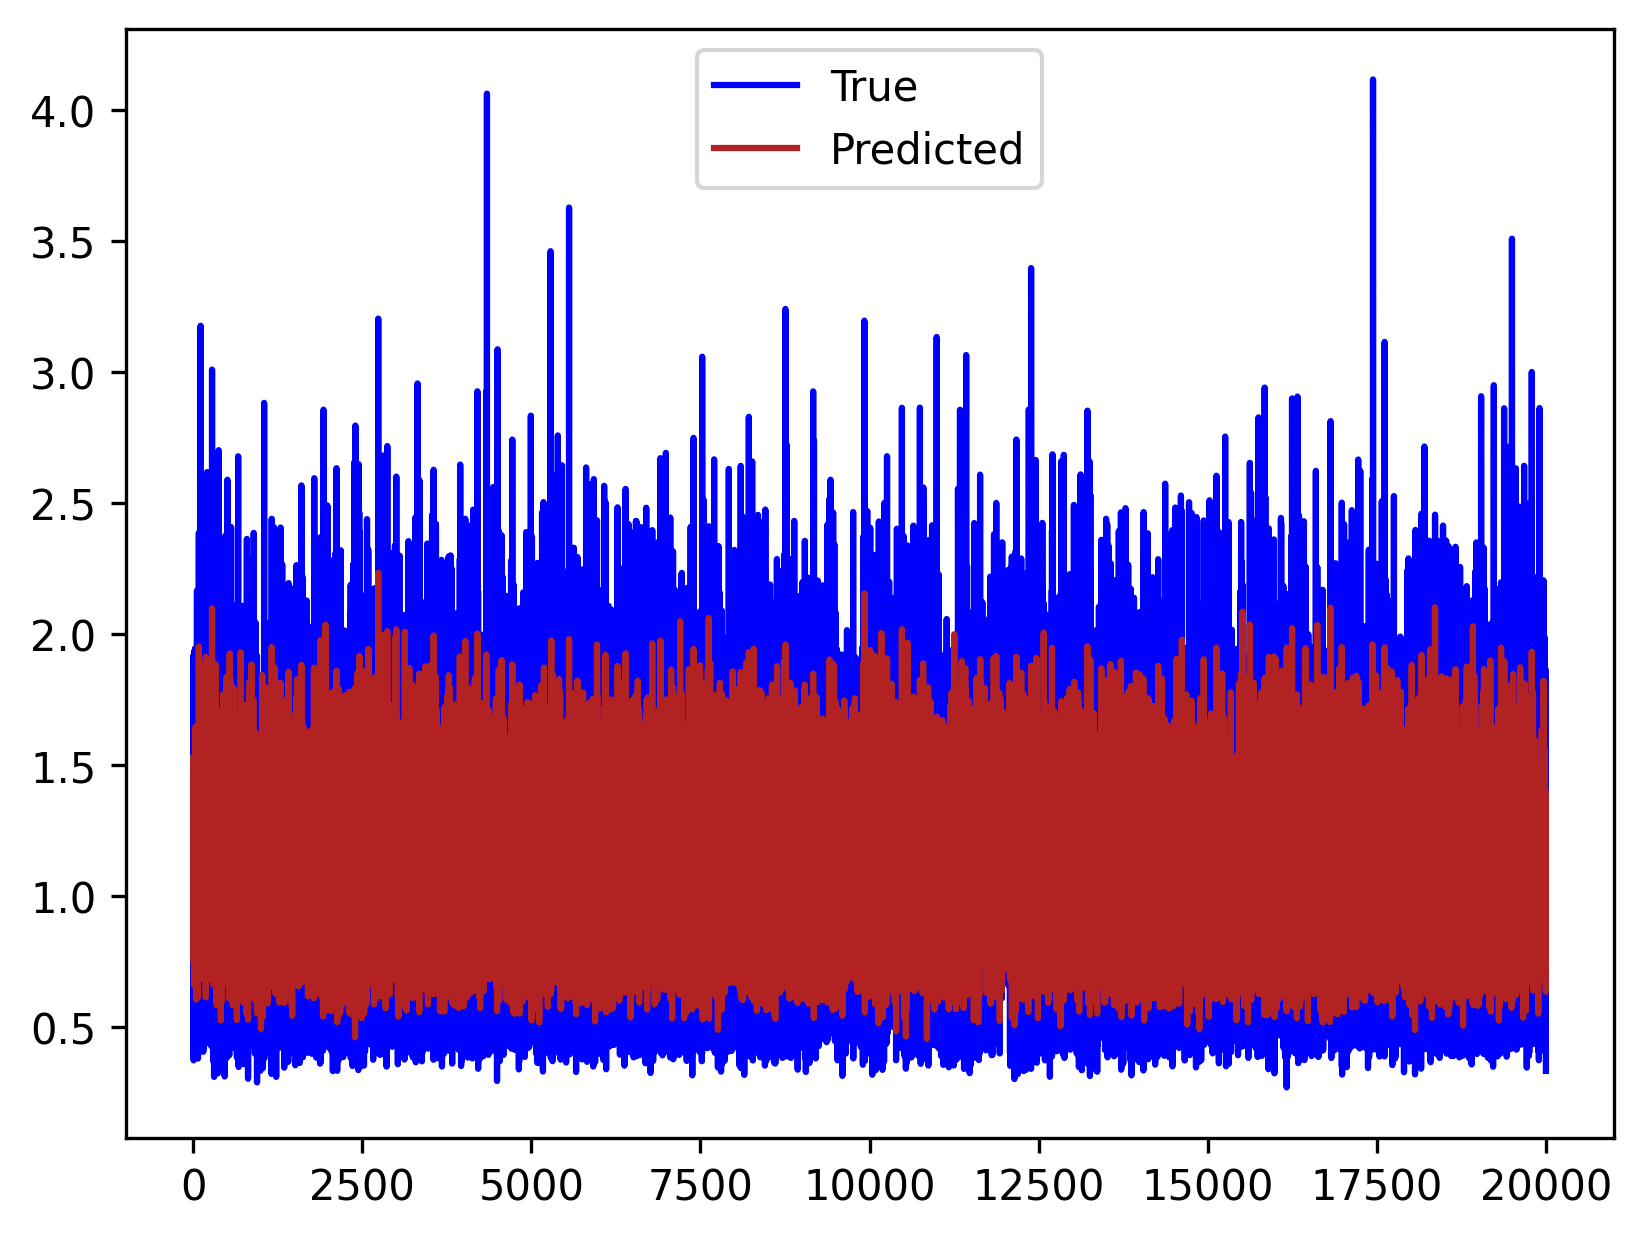

In [8]:
fig, ax = plt.subplots(1,1,dpi=300)
ax.plot(val[3].to_numpy(), label='True', color='blue')
ax.plot( RF.predict(val[1].to_numpy()), label='Predicted',color='firebrick' )
ax.legend()
plt.show()

In [4]:
parameter_space = dict()
parameter_space['n_estimators'] = Integer(30,300)
parameter_space['min_samples_split'] = Integer(2,5, prior='uniform')
parameter_space['min_samples_leaf'] = Integer(1,5, prior='uniform')
parameter_space['max_samples'] = Integer(1_000, 20_000, prior='uniform')
parameter_space['max_features'] = Integer(10,195)
parameter_space['max_depth'] = Integer(10,50)
# parameter_space['ccp_alpha'] = Real(1e-4, 5e-4)
# 'max_depth': 26, 'max_features': 19, 'n_estimators': 300}) with MSE: -0.2149719486225359
# n_estimators=201, max_features=20, max_depth=25
# 'max_depth': 44, 'max_features': 43, 'max_samples': 12224, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 220}) with MSE: -46041.985409253015

In [ ]:
bae = BayesSearchCV(estimator=RF,search_spaces=parameter_space,verbose=10, n_iter=200, scoring='neg_mean_squared_error', n_points=6, cv=val, n_jobs=24, random_state=0)
bae.fit(sobj.iloc[:,:-1], sobj.iloc[:,-1])
res = pd.DataFrame(bae.cv_results_)
res.to_excel(r"C:\Users\dwigh\OneDrive\Desktop\Emissions Uncertainty on Antarctic Instability\Hyperparameter_Tuning\CAT_HT2.xlsx")
res.to_csv(r"C:\Users\dwigh\OneDrive\Desktop\Emissions Uncertainty on Antarctic Instability\Hyperparameter_Tuning\CAT_HT2.csv")
print(f'Best Parameters:{bae.best_params_} with MSE: {bae.best_score_}')

In [9]:
rng = np.random.default_rng(seed=0)
def bootstrapp(y_true,y_pred,n_boots):
    rows = len(y_true)
    error = (y_true - y_pred).to_numpy()
    S_CI = np.zeros((n_boots,))
    for i in range(n_boots):
        indx = rng.choice(rows, size=rows, replace=True)
        S_CI[i] = np.mean(np.square(error[indx]))
    return S_CI

In [10]:
def pvi1(data: pd.DataFrame, y_true: np.ndarray[float], f: callable,*, n_boots: int, alpha: float, column_set: dict) -> tuple[pd.DataFrame]:
    rows, columns = data.shape
    npv_columns = column_set
    V_y = np.var(y_true, ddof=1)
    u = dict()
    CI = dict()
    rolled_data = pd.DataFrame(np.roll(data.copy(),rows//2, axis=0), columns=data.columns)
    # rolled_data = np.roll(data.copy(),rows//2, axis=0)
    # for cat,col in npv_columns.items():
    for cat in npv_columns:
        d = rolled_data.copy()
        d[cat] = data[cat].to_numpy()
        y_pred = f(d)
        u[cat] = 1-np.mean(np.square(y_true - y_pred))/(2*V_y)
    #     S_CI = 1 - bootstrapp(y_true,y_pred, n_boots)/(2*V_y)
    #     p0,p1 = np.quantile(S_CI, [alpha,1-alpha])
    #     CI[col] = [p0,p1,p1-p0]
    # CI = pd.DataFrame(CI.values(), index = CI.keys(), columns=['5th','95th','Quantile Difference'])
    # CI.index.name = 'Interactions'
    # CI.columns.name = 'Confidence Interval Difference'
    # SI = pd.DataFrame(u.values(), index=u.keys(), columns=['$P_{i}$'])
    return u

In [11]:
def pvi2(data: np.ndarray[float], y_true: np.ndarray[float], f: callable,*,S_I: np.ndarray[float] ,n_boots: int, alpha: float, columns_set: dict) -> tuple[np.ndarray[float], list]:
    '''
    ===Second-Order Permutation Variable Importances (Full Matrix)===

        data: your training dataset
        y_pred: your model output (specifically the y_true value)
        f: in this case, simply RF.predict

        S_I: First-Order Importances
        n_boots: number of bootstrap samples
        alpha: parameter for confidence interval [alpha, 1-alpha]
        S_CI: sampling distribution 
        CI: Confidence Intervals
    '''
    rows, columns = data.shape
    npv_columns = columns_set
    n = n_boots
    S = dict()
    CI = dict()
    V_y = np.var(y_true, ddof=1)
    # rolled_data = pd.DataFrame(np.roll(data.copy(),rows//2, axis=0), columns=data.columns)
    rolled_data = np.roll(data.copy(),rows//2, axis=0)
    for (cat1,col1),(cat2,col2) in it.combinations(npv_columns, r=2):
        d = rolled_data.copy()
        d[:,[cat1, cat2]] = data[:,[cat1,cat2]]
        y_pred = f(d)
        S_cat1 = S_I[col1]
        S_cat2 = S_I[col2]
        # print(f'First-Order:\t{S_cat1, S_cat2}')
        # print(f'First Part:\t{np.mean(np.square(y_true - f(d)))/(2*V_y)}')
        # print(f'Second Part:\t{S_cat1}')
        # print(f'Third Part:\t{S_cat2}')
        S[(col1,col2)] = 1 - np.mean(np.square(y_true - y_pred))/(2*V_y) - S_cat1 - S_cat2
        print(f'Second-Order:{(col1,col2)}\t{S[col1,col2]}')

    #     S_CI = 1 - bootstrapp(y_true,y_pred, n_boots)/(2*V_y) - S_cat1 - S_cat2
    #     p0,p1= np.quantile(S_CI, [alpha,1-alpha])
    #     CI[(col1, col2)] = [p0,p1,p1-p0]
    # CI = pd.DataFrame(CI.values(), index = CI.keys(), columns=['5th','95th','Quantile Difference'])
    # CI.index.name = 'Interactions'
    # CI.columns.name = 'Confidence Interval Difference'

    # S = pd.DataFrame(S.values(), index=S.keys(), columns=[r'$P_{ik}$'])
    return S

In [12]:
def pvi_t(data: np.ndarray[float], y_true: np.ndarray[float], f: callable,*,n_boots: int, alpha: float, column_set: list[str]) -> np.ndarray[float]:
    '''
    ===Total-Order Permutation Variable Importances===

        data: your training dataset
        y_pred: your model output (specifically the prediction of your 'data' arg)
        f: in this case, simply RF.predict
    '''
    rows, columns = data.shape
    npv_columns = column_set
    u = dict()
    V_y = np.var(y_true, ddof=1)
    CI = dict()
    for col,cat in enumerate(npv_columns):
        d = data.copy()
        d[:, col] = np.roll(data[:,col],rows//2, axis=0)
        y_pred = f(d)
        u[cat] = np.mean(np.square(y_true - y_pred))/(2*V_y)
    #     S_CI = bootstrapp(y_true,y_pred, n_boots)/(2*V_y)
    #     p0,p1 = np.quantile(S_CI, [alpha,1-alpha])
    #     CI[col] = [p0,p1,p1-p0]
    # CI = pd.DataFrame(CI.values(), index = CI.keys(), columns=['5th','95th','Quantile Difference'])
    # CI.index.name = 'Interactions'
    # CI.columns.name = 'Confidence Interval Difference'
    # S_t = pd.DataFrame(u.values(), index=u.keys(), columns=[r'$P_{\tau}$'])
    return u

In [13]:
PI = pvi1(val[0],val[2], RF.predict,n_boots=None, alpha=None, column_set=val[0].columns)

In [14]:
PI

{'gamma_g': 0.3658280830085001,
 'gamma_d': 0.4157257398956101,
 'sd_temp': 0.333187569908176,
 'sd_ocean_heat': 0.3332618531961119,
 'sd_glaciers': 0.3331575690041402,
 'sd_greenland': 0.3338834964794266,
 'sd_antarctic': 0.3338724053039934,
 'sd_gmsl': 0.33356730128432965,
 'rho_temperature': 0.33362837687669167,
 'rho_ocean_heat': 0.33332390238079224,
 'rho_glaciers': 0.3331669150739981,
 'rho_greenland': 0.3353412694049629,
 'rho_antarctic': 0.3333438040091329,
 'rho_gmsl': 0.3339702042938726,
 'CO2_0': 0.33328793393886114,
 'N2O_0': 0.33332463375617916,
 'temperature_0': 0.342431589374803,
 'ocean_heat_0': 0.33748343751020804,
 'thermal_s0': 0.3332258804640056,
 'greenland_v0': 0.33323657417480346,
 'glaciers_v0': 0.333357273062319,
 'glaciers_s0': 0.33332999199645974,
 'antarctic_s0': 0.33320261527894757,
 'Q10': 0.3333705142654425,
 'CO2_fertilization': 0.3335906918287139,
 'CO2_diffusivity': 0.33350500337715594,
 'heat_diffusivity': 0.34197286523460624,
 'rf_scale_aerosol': 0.4

In [15]:
PT = pvi_t(val[0].to_numpy(), val[2].to_numpy(), RF.predict,n_boots=None, alpha=None, column_set=val[0].columns)

c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid fea

In [16]:
PT

{'gamma_g': 0.27193265070273837,
 'gamma_d': 0.32204985446423906,
 'sd_temp': 0.2239870093778092,
 'sd_ocean_heat': 0.2240418836694041,
 'sd_glaciers': 0.22385417311079148,
 'sd_greenland': 0.2243180650741469,
 'sd_antarctic': 0.22444672611429722,
 'sd_gmsl': 0.2240371917600167,
 'rho_temperature': 0.2241522027576632,
 'rho_ocean_heat': 0.22399120932950684,
 'rho_glaciers': 0.22397490938121084,
 'rho_greenland': 0.2249843631279165,
 'rho_antarctic': 0.22394735604491664,
 'rho_gmsl': 0.2243541143455422,
 'CO2_0': 0.22403383357121717,
 'N2O_0': 0.22407360845601051,
 'temperature_0': 0.22939040766340732,
 'ocean_heat_0': 0.22617492102250755,
 'thermal_s0': 0.22387131870513788,
 'greenland_v0': 0.22403663997178502,
 'glaciers_v0': 0.2241405123338135,
 'glaciers_s0': 0.22405033709583846,
 'antarctic_s0': 0.22397049509254943,
 'Q10': 0.22753270008478396,
 'CO2_fertilization': 0.22438181691211057,
 'CO2_diffusivity': 0.22450662457120185,
 'heat_diffusivity': 0.22944292499990926,
 'rf_scale_ae

In [17]:
zipped = zip(range(val[0].shape[1]), val[0].columns)
# print(list(zipped))
PIK = pvi2(val[0].to_numpy(), val[2].to_numpy(), RF.predict, S_I=PI,n_boots=None, alpha=None, columns_set=list(zipped))

c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'gamma_d')	-0.33476785634566797


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'sd_temp')	-0.3322849327948414


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'sd_ocean_heat')	-0.33229339940191105


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'sd_glaciers')	-0.33229630298293555


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'sd_greenland')	-0.3322920238658459


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'sd_antarctic')	-0.3323153425288312


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'sd_gmsl')	-0.332324957397113


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'rho_temperature')	-0.3323329004018384


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'rho_ocean_heat')	-0.3322620752147093


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'rho_glaciers')	-0.33225705035862696


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'rho_greenland')	-0.33251973656233313


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'rho_antarctic')	-0.3322610186784317


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'rho_gmsl')	-0.3323619107751371


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'CO2_0')	-0.332314056359751


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'N2O_0')	-0.332216472837656


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'temperature_0')	-0.33322107003666523


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'ocean_heat_0')	-0.33261216898170964


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'thermal_s0')	-0.3322150300410235


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'greenland_v0')	-0.33227705518878103


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'glaciers_v0')	-0.3322787221802008


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'glaciers_s0')	-0.3322633386037629


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'antarctic_s0')	-0.3323060642736213


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'Q10')	-0.33269892385585764


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'CO2_fertilization')	-0.33236423154175676


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'CO2_diffusivity')	-0.3323377956918788


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'heat_diffusivity')	-0.3327963839284639


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'rf_scale_aerosol')	-0.3346408473577873
Second-Order:('gamma_g', 'climate_sensitivity')	-0.33533531499343283


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'thermal_alpha')	-0.33263674764433315


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'greenland_a')	-0.3324083088390203


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'greenland_b')	-0.3323812593810559


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'greenland_alpha')	-0.33229371467916646


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'greenland_beta')	-0.33260564449227203


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'glaciers_beta0')	-0.33235749784241697


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'glaciers_n')	-0.33220163488230514


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'anto_alpha')	-0.3323523659862


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'anto_beta')	-0.33225654264961535


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'antarctic_gamma')	-0.33227042943402596


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'antarctic_alpha')	-0.3323104256400331


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'antarctic_mu')	-0.3325336937788238


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'antarctic_nu')	-0.3322272123469898


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'antarctic_precip0')	-0.3324010633143676


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'antarctic_kappa')	-0.33229673464623455


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'antarctic_flow0')	-0.33238726509384475


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'antarctic_runoff_height0')	-0.33229017866262855


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'antarctic_c')	-0.33222014375482145


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'antarctic_bed_height0')	-0.3322861422385589


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'antarctic_slope')	-0.3322752677975088


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'antarctic_lambda')	-0.3347503112586483


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'antarctic_temp_threshold')	-0.3360646635103358


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'lw_random_sample')	-0.3324686190667753


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2030.0')	-0.33202785598649487


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2031.0')	-0.3320327600292353


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2032.0')	-0.33205134981018514


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2033.0')	-0.3320564842771411


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2034.0')	-0.33202094477353516


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2035.0')	-0.33204945572118116


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2036.0')	-0.3320461095958558


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2037.0')	-0.3320394510504744


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2038.0')	-0.33200951073252316


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2039.0')	-0.3320516185110419


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2040.0')	-0.3320568660310035


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2041.0')	-0.3320044288864693


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2042.0')	-0.33203687745410326


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2043.0')	-0.3320377535256298


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2044.0')	-0.3320471409917086


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2045.0')	-0.3320481713803486


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2046.0')	-0.33203130155851623


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2047.0')	-0.33203253681927825


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2048.0')	-0.33203857400739767


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2049.0')	-0.33200506008300124


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2050.0')	-0.3320093865441126


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2051.0')	-0.33204731242932617


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2052.0')	-0.3320161622534059


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2053.0')	-0.33203344314135763


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2054.0')	-0.3320345402885988


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2055.0')	-0.33203444778186486


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2056.0')	-0.33202765643973187


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2057.0')	-0.3320336546913444


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2058.0')	-0.33202273997024745


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2059.0')	-0.3320260404284384


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2060.0')	-0.33202512777870885


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2061.0')	-0.33202508526490393


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2062.0')	-0.33202715520614956


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2063.0')	-0.3320239412649312


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2064.0')	-0.33202478794717316


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2065.0')	-0.33202502190895244


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2066.0')	-0.33202450029840047


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2067.0')	-0.3320251185478269


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2068.0')	-0.3320249734375166


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2069.0')	-0.33202511198491347


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2070.0')	-0.3320241970507839


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2071.0')	-0.332025575079148


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2072.0')	-0.33202470646402527


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2073.0')	-0.33202420872866156
Second-Order:('gamma_g', 'emission_year_2074.0')	-0.3320246507402099


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2075.0')	-0.3320243655668004


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2076.0')	-0.3320250406214421


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2077.0')	-0.33202171360393573


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2078.0')	-0.33202317230355105


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2079.0')	-0.33202740717185786


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2080.0')	-0.33202806917041083


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2081.0')	-0.3320283189478861


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2082.0')	-0.33202396951948276


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2083.0')	-0.33202497296050004


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2084.0')	-0.3320260245309369


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2085.0')	-0.33203414813468335


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2086.0')	-0.3320282643047041


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2087.0')	-0.3320265123391223


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2088.0')	-0.3320371398770561


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2089.0')	-0.3320269134309687


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2090.0')	-0.3320243889300275


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2091.0')	-0.3320452567384534


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2092.0')	-0.33203282598788764


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2093.0')	-0.33203031289290497


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2094.0')	-0.3320561153537671


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2095.0')	-0.33204608666723834


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2096.0')	-0.33202581923011143


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2097.0')	-0.3320493854928017


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2098.0')	-0.3320307712296635


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2099.0')	-0.3320422883815495


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2100.0')	-0.33204872309334943


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2101.0')	-0.3320496765498756


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2102.0')	-0.3320385762287148


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2103.0')	-0.3320482711595294


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2104.0')	-0.33202964171891514


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2105.0')	-0.332031545788563


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2106.0')	-0.33204167689253306


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2107.0')	-0.332047483324882


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2108.0')	-0.33202590712509594


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2109.0')	-0.33203766517970856


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2110.0')	-0.3320298196100463


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2111.0')	-0.3320453773256853


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2112.0')	-0.33202615179341666


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2113.0')	-0.3320274213643083


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2114.0')	-0.3320287876146225


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2115.0')	-0.3320313556280682


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2116.0')	-0.332018583628342


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2117.0')	-0.33204415690458144


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2118.0')	-0.3320331093779265


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2119.0')	-0.3320213167168721


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2120.0')	-0.3320305866214498


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2121.0')	-0.3320240772176345


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2122.0')	-0.3320217539608368


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2123.0')	-0.3320247621710357


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2124.0')	-0.33203185208363606


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2125.0')	-0.33203025546828757


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2126.0')	-0.33202480396712075


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2127.0')	-0.33202597190589567


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2128.0')	-0.3320268719094611


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2129.0')	-0.33202582408355297


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2130.0')	-0.33202402239063467


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2131.0')	-0.33202537489172335


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2132.0')	-0.33202468969302423


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2133.0')	-0.33202437362041115


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2134.0')	-0.33202691758342784


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2135.0')	-0.3320245951678156


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2136.0')	-0.33202521042105115


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2137.0')	-0.33202434978535655


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2138.0')	-0.332024599067105


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2139.0')	-0.33202459906710513


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2140.0')	-0.3320247261827334


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2141.0')	-0.33202459906710513


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2142.0')	-0.33202459906710513


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2143.0')	-0.33202477479813275


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2144.0')	-0.33202459906710513


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2145.0')	-0.33202459906710513


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2146.0')	-0.33202459906710513


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2147.0')	-0.332024599067105


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2148.0')	-0.33202459906710513


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2149.0')	-0.33202459906710513


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2150.0')	-0.33202459906710513


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2151.0')	-0.33202459906710513


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2152.0')	-0.332024599067105


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2153.0')	-0.33202459906710513


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2154.0')	-0.33202459906710513


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2155.0')	-0.33202459906710513


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2156.0')	-0.33202459906710513


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2157.0')	-0.332024599067105


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2158.0')	-0.33202459906710513


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2159.0')	-0.33202459906710513


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2160.0')	-0.33202459906710513


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2161.0')	-0.33202459906710513


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2162.0')	-0.33202459906710513


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2163.0')	-0.33202459906710513


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2164.0')	-0.33202459906710513


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2165.0')	-0.33202459906710513


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2166.0')	-0.332024599067105


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2167.0')	-0.33202459906710513


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2169.0')	-0.33202459906710513


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2171.0')	-0.33202459906710513


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2172.0')	-0.33202459906710513


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_g', 'emission_year_2178.0')	-0.33202459906710513


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_d', 'sd_temp')	-0.3322792204778183


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_d', 'sd_ocean_heat')	-0.33229918033821415


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_d', 'sd_glaciers')	-0.33225267845798134


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_d', 'sd_greenland')	-0.3323594252283977


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_d', 'sd_antarctic')	-0.3323126561395695


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_d', 'sd_gmsl')	-0.332263782770301


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_d', 'rho_temperature')	-0.3323251696136048


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_d', 'rho_ocean_heat')	-0.3322974032935879


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_d', 'rho_glaciers')	-0.3322386183132495


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_d', 'rho_greenland')	-0.3324616329303146


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_d', 'rho_antarctic')	-0.3322252689312858


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_d', 'rho_gmsl')	-0.3323848294705364


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_d', 'CO2_0')	-0.33218592085359


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_d', 'N2O_0')	-0.33228461786811525


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_d', 'temperature_0')	-0.333489474597348


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_d', 'ocean_heat_0')	-0.3326682074138795


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_d', 'thermal_s0')	-0.33221399090760007


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_d', 'greenland_v0')	-0.33229937303600454


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_d', 'glaciers_v0')	-0.3322577031963011


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_d', 'glaciers_s0')	-0.33234629785379355


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_d', 'antarctic_s0')	-0.3322113295188819


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_d', 'Q10')	-0.3325457428306301


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_d', 'CO2_fertilization')	-0.3323380198813324


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_d', 'CO2_diffusivity')	-0.3321695780993871


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_d', 'heat_diffusivity')	-0.33299494305047306


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Second-Order:('gamma_d', 'rf_scale_aerosol')	-0.33481195809757436


c:\Users\dwigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
zipped = zip(range(val[0].shape[1]), val[0].columns)
print(list(zipped))